In [1]:
import matplotlib.pyplot as plt
%matplotlib inline  
import matplotlib.pylab as pylab

import numpy as np
import pandas as pd

columns = ["duration", "protocol_type", "service", 
           "flag", "src_bytes", "dst_bytes", "land", 
           "wrong_fragment", "urgent", "hot", "num_failed_logins", 
           "logged_in", "num_compromised", "root_shell", 
           "su_attempted", "num_root", "num_file_creations", 
           "num_shells", "num_access_files", "num_outbound_cmds", 
           "is_host_login", "is_guest_login", "count", "srv_count", 
           "serror_rate", "srv_serror_rate", "rerror_rate", 
           "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", 
           "srv_diff_host_rate", "dst_host_count", 
           "dst_host_srv_count", "dst_host_same_srv_rate", 
           "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", 
           "dst_host_srv_diff_host_rate", "dst_host_serror_rate", 
           "dst_host_srv_serror_rate", "dst_host_rerror_rate", 
           "dst_host_srv_rerror_rate", "outcome"]

dataset = pd.read_csv('./kdd/kddcup.dat', names=columns, nrows=1000000)

In [2]:
print(dataset.head())

   duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        215      45076     0   
1         0           tcp    http   SF        162       4528     0   
2         0           tcp    http   SF        236       1228     0   
3         0           tcp    http   SF        233       2032     0   
4         0           tcp    http   SF        239        486     0   

   wrong_fragment  urgent  hot   ...     dst_host_srv_count  \
0               0       0    0   ...                      0   
1               0       0    0   ...                      1   
2               0       0    0   ...                      2   
3               0       0    0   ...                      3   
4               0       0    0   ...                      4   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                       0                       0   
1                       1                       0   
2                       1                

In [3]:
dataset.shape

(1000000, 42)

In [4]:
dataset.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [5]:
sorted(dataset['outcome'].unique())

['back.',
 'buffer_overflow.',
 'ftp_write.',
 'guess_passwd.',
 'imap.',
 'ipsweep.',
 'land.',
 'loadmodule.',
 'multihop.',
 'neptune.',
 'nmap.',
 'normal.',
 'perl.',
 'phf.',
 'pod.',
 'portsweep.',
 'satan.',
 'smurf.',
 'teardrop.',
 'warezmaster.']

In [6]:
from sklearn.preprocessing import LabelEncoder

labels_enc = LabelEncoder()

labels = labels_enc.fit_transform(dataset['outcome'])
labels_map = labels_enc.classes_
labels_map

array(['back.', 'buffer_overflow.', 'ftp_write.', 'guess_passwd.', 'imap.',
       'ipsweep.', 'land.', 'loadmodule.', 'multihop.', 'neptune.',
       'nmap.', 'normal.', 'perl.', 'phf.', 'pod.', 'portsweep.', 'satan.',
       'smurf.', 'teardrop.', 'warezmaster.'], dtype=object)

In [7]:
dataset.drop('outcome', axis=1, inplace=True)

In [8]:
observations = pd.get_dummies(dataset, sparse=True)

del dataset

In [9]:
observations.shape

(1000000, 118)

In [10]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(observations.as_matrix(), labels, 
                                                    train_size=0.5, random_state=101)

del observations

In [11]:
def plot_normalised_confusion_matrix(cm, labels_str, title='Normalised confusion matrix', cmap=plt.cm.Blues):
    pylab.rcParams['figure.figsize'] = (6.0, 6.0)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm_normalized, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels_str))
    plt.xticks(tick_marks, labels_str, rotation=90)
    plt.yticks(tick_marks, labels_str)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



TRAIN SET
Accuracy: 0.781702
Confusion matrix:


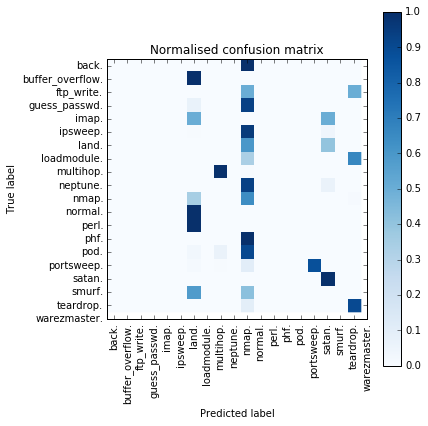

Classification report:
                  precision    recall  f1-score   support

           back.       0.00      0.00      0.00      1005
buffer_overflow.       0.00      0.00      0.00         1
      ftp_write.       0.00      0.00      0.00         2
   guess_passwd.       0.00      0.00      0.00        30
           imap.       0.00      0.00      0.00         2
        ipsweep.       0.00      0.00      0.00      3730
           land.       0.00      0.00      0.00        10
     loadmodule.       0.00      0.00      0.00         3
       multihop.       1.00      1.00      1.00    102522
        neptune.       0.06      0.00      0.00      1149
           nmap.       0.96      0.64      0.77    281101
         normal.       0.00      0.00      0.00         1
           perl.       0.00      0.00      0.00         2
            phf.       0.00      0.00      0.00        22
            pod.       0.00      0.00      0.00      1437
      portsweep.       1.00      0.88      0.93 

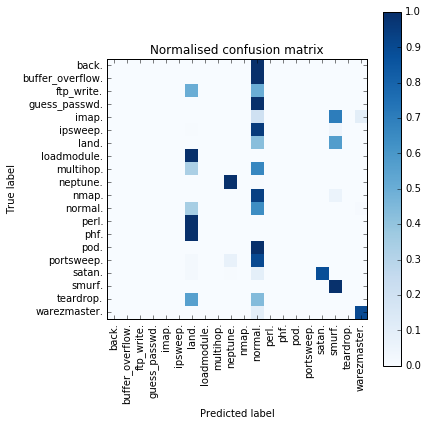

Classification report:
                  precision    recall  f1-score   support

           back.       0.00      0.00      0.00       997
buffer_overflow.       0.00      0.00      0.00         4
      ftp_write.       0.00      0.00      0.00         6
   guess_passwd.       0.00      0.00      0.00        23
           imap.       0.00      0.00      0.00        10
        ipsweep.       0.00      0.00      0.00      3849
           land.       0.00      0.00      0.00         7
     loadmodule.       0.00      0.00      0.00         2
       multihop.       0.00      0.00      0.00         3
        neptune.       1.00      1.00      1.00    102293
           nmap.       0.05      0.00      0.00      1167
         normal.       0.96      0.64      0.77    281286
           perl.       0.00      0.00      0.00         1
            phf.       0.00      0.00      0.00         1
            pod.       0.00      0.00      0.00        18
      portsweep.       0.00      0.00      0.00 

In [12]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

clf = SGDClassifier('log', random_state=101)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print("TRAIN SET")
print("Accuracy:", accuracy_score(y_train, y_train_pred))

print("Confusion matrix:")
plot_normalised_confusion_matrix(confusion_matrix(y_train, y_train_pred), labels_map)

print("Classification report:")
print(classification_report(y_train, y_train_pred, target_names=labels_map))



print("TEST SET")
print("Accuracy:", accuracy_score(y_test, y_test_pred))

print("Confusion matrix:")
plot_normalised_confusion_matrix(confusion_matrix(y_test, y_test_pred), labels_map)

print("Classification report:")
print(classification_report(y_test, y_test_pred, target_names=labels_map))



In [13]:
import random
random.seed(101)

def sample_class_with_replacement(X, y, label, min_samples_out, max_samples_out):
    rows = np.where(y==label)[0]
    
    if len(rows) == 0:
        raise Exception
    
    n_estraction = min(max(len(rows), min_samples_out), max_samples_out)
    extracted = [random.choice(rows) for _ in range(n_estraction)]
    
    return extracted


train_idx = []

for label in np.unique(labels):
    try:
        idx = sample_class_with_replacement(X_train, y_train, label, 500, 20000)
        train_idx.extend(idx)
    except:
        pass
    
X_train_sampled_balanced = X_train[train_idx, :]
y_train_sampled_balanced = y_train[train_idx]


TRAIN SET
Accuracy: 0.712668335121
Confusion matrix:


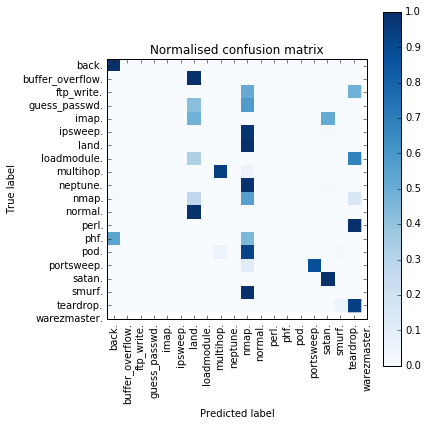

Classification report:
                  precision    recall  f1-score   support

           back.       0.64      1.00      0.78      1005
buffer_overflow.       0.00      0.00      0.00       500
      ftp_write.       0.00      0.00      0.00       500
   guess_passwd.       0.00      0.00      0.00       500
           imap.       0.00      0.00      0.00       500
        ipsweep.       0.00      0.00      0.00      3730
           land.       0.00      0.00      0.00       500
     loadmodule.       0.00      0.00      0.00       500
       multihop.       1.00      0.94      0.97     20000
        neptune.       0.00      0.00      0.00      1149
           nmap.       0.54      0.56      0.55     20000
         normal.       0.00      0.00      0.00       500
           perl.       0.00      0.00      0.00       500
            phf.       0.00      0.00      0.00       500
            pod.       0.31      0.00      0.01      1437
      portsweep.       0.99      0.88      0.93 

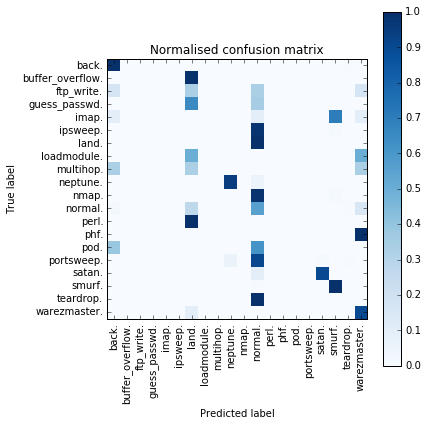

Classification report:
                  precision    recall  f1-score   support

           back.       0.18      0.99      0.31       997
buffer_overflow.       0.00      0.00      0.00         4
      ftp_write.       0.00      0.00      0.00         6
   guess_passwd.       0.00      0.00      0.00        23
           imap.       0.00      0.00      0.00        10
        ipsweep.       0.00      0.00      0.00      3849
           land.       0.00      0.00      0.00         7
     loadmodule.       0.00      0.00      0.00         2
       multihop.       0.00      0.00      0.00         3
        neptune.       1.00      0.94      0.97    102293
           nmap.       0.00      0.00      0.00      1167
         normal.       0.92      0.56      0.69    281286
           perl.       0.00      0.00      0.00         1
            phf.       0.00      0.00      0.00         1
            pod.       0.00      0.00      0.00        18
      portsweep.       0.04      0.00      0.01 

In [14]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

clf = SGDClassifier('log', random_state=101)
clf.fit(X_train_sampled_balanced, y_train_sampled_balanced)

y_train_pred = clf.predict(X_train_sampled_balanced)
y_test_pred = clf.predict(X_test)

print("TRAIN SET")
print("Accuracy:", accuracy_score(y_train_sampled_balanced, y_train_pred))

print("Confusion matrix:")
plot_normalised_confusion_matrix(confusion_matrix(y_train_sampled_balanced, y_train_pred), labels_map)

print("Classification report:")
print(classification_report(y_train_sampled_balanced, y_train_pred, target_names=labels_map))



print("TEST SET")
print("Accuracy:", accuracy_score(y_test, y_test_pred))

print("Confusion matrix:")
plot_normalised_confusion_matrix(confusion_matrix(y_test, y_test_pred), labels_map)

print("Classification report:")
print(classification_report(y_test, y_test_pred, target_names=labels_map))



SGDClassifier(alpha=0.01, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=101, shuffle=True,
       verbose=0, warm_start=False)
TRAIN SET
Accuracy: 0.695202531813
Confusion matrix:


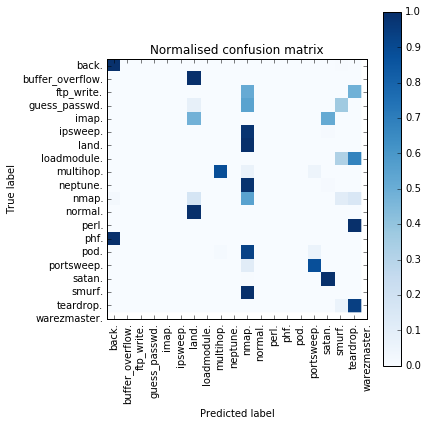

Classification report:
                  precision    recall  f1-score   support

           back.       0.54      0.99      0.70      1005
buffer_overflow.       0.00      0.00      0.00       500
      ftp_write.       0.00      0.00      0.00       500
   guess_passwd.       0.00      0.00      0.00       500
           imap.       0.00      0.00      0.00       500
        ipsweep.       0.00      0.00      0.00      3730
           land.       0.00      0.00      0.00       500
     loadmodule.       0.00      0.00      0.00       500
       multihop.       1.00      0.89      0.94     20000
        neptune.       0.00      0.00      0.00      1149
           nmap.       0.54      0.55      0.55     20000
         normal.       0.00      0.00      0.00       500
           perl.       0.00      0.00      0.00       500
            phf.       0.00      0.00      0.00       500
            pod.       0.00      0.00      0.00      1437
      portsweep.       0.69      0.88      0.77 

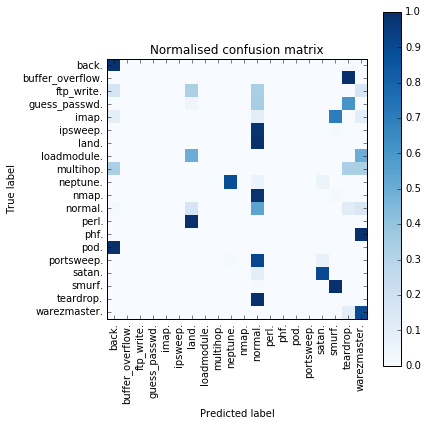

Classification report:
                  precision    recall  f1-score   support

           back.       0.15      0.99      0.27       997
buffer_overflow.       0.00      0.00      0.00         4
      ftp_write.       0.00      0.00      0.00         6
   guess_passwd.       0.00      0.00      0.00        23
           imap.       0.00      0.00      0.00        10
        ipsweep.       1.00      0.00      0.00      3849
           land.       0.00      0.00      0.00         7
     loadmodule.       0.00      0.00      0.00         2
       multihop.       0.00      0.00      0.00         3
        neptune.       1.00      0.88      0.94    102293
           nmap.       0.00      0.00      0.00      1167
         normal.       0.92      0.55      0.68    281286
           perl.       0.00      0.00      0.00         1
            phf.       0.00      0.00      0.00         1
            pod.       0.00      0.00      0.00        18
      portsweep.       0.00      0.00      0.00 

In [15]:
from sklearn.grid_search import GridSearchCV

parameters = {
    'loss': ('log', 'hinge'),
    'alpha': [0.1, 0.01, 0.001, 0.0001]
}

clfgs = GridSearchCV(SGDClassifier(random_state=101, n_jobs=1),
                   param_grid=parameters,
                   cv=3,
                   n_jobs=1,
                   scoring='accuracy'
                  )
clfgs.fit(X_train_sampled_balanced, y_train_sampled_balanced)
clf = clfgs.best_estimator_

print(clfgs.best_estimator_)

y_train_pred = clf.predict(X_train_sampled_balanced)
y_test_pred = clf.predict(X_test)

print("TRAIN SET")
print("Accuracy:", accuracy_score(y_train_sampled_balanced, y_train_pred))

print("Confusion matrix:")
plot_normalised_confusion_matrix(confusion_matrix(y_train_sampled_balanced, y_train_pred), 
                                 labels_map)

print("Classification report:")
print(classification_report(y_train_sampled_balanced, y_train_pred, target_names=labels_map))



print("TEST SET")
print("Accuracy:", accuracy_score(y_test, y_test_pred))

print("Confusion matrix:")
plot_normalised_confusion_matrix(confusion_matrix(y_test, y_test_pred), labels_map)

print("Classification report:")
print(classification_report(y_test, y_test_pred, target_names=labels_map))




TRAIN SET
Accuracy: 0.846250612429
Confusion matrix:


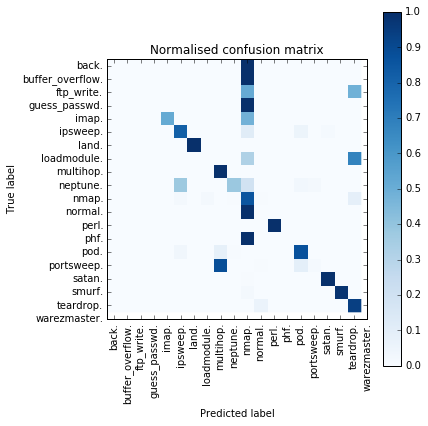

Classification report:
                  precision    recall  f1-score   support

           back.       0.00      0.00      0.00      1005
buffer_overflow.       0.00      0.00      0.00       500
      ftp_write.       0.00      0.00      0.00       500
   guess_passwd.       0.00      0.00      0.00       500
           imap.       1.00      0.52      0.68       500
        ipsweep.       0.76      0.81      0.79      3730
           land.       1.00      1.00      1.00       500
     loadmodule.       0.00      0.00      0.00       500
       multihop.       0.89      1.00      0.94     20000
        neptune.       0.75      0.38      0.51      1149
           nmap.       0.79      0.86      0.82     20000
         normal.       0.00      0.00      0.00       500
           perl.       0.97      1.00      0.98       500
            phf.       0.00      0.00      0.00       500
            pod.       0.69      0.87      0.77      1437
      portsweep.       0.43      0.01      0.02 

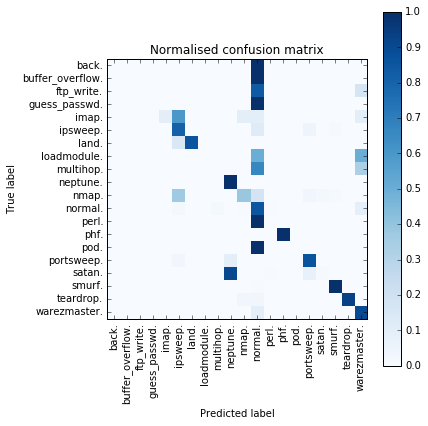

Classification report:
                  precision    recall  f1-score   support

           back.       0.00      0.00      0.00       997
buffer_overflow.       0.00      0.00      0.00         4
      ftp_write.       0.00      0.00      0.00         6
   guess_passwd.       0.00      0.00      0.00        23
           imap.       1.00      0.10      0.18        10
        ipsweep.       0.31      0.81      0.45      3849
           land.       0.32      0.86      0.46         7
     loadmodule.       0.00      0.00      0.00         2
       multihop.       0.00      0.00      0.00         3
        neptune.       0.98      1.00      0.99    102293
           nmap.       0.21      0.39      0.27      1167
         normal.       0.99      0.85      0.92    281286
           perl.       0.00      0.00      0.00         1
            phf.       0.00      1.00      0.01         1
            pod.       0.00      0.00      0.00        18
      portsweep.       0.57      0.86      0.69 

In [16]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.grid_search import GridSearchCV

parameters = {
    'estimator__loss': ('log', 'hinge'),
    'estimator__alpha': [1.0, 0.1, 0.01, 0.001, 0.0001, 0.00001]
}

clfgs = GridSearchCV(OneVsOneClassifier(SGDClassifier(random_state=101, n_jobs=1)),
                   param_grid=parameters,
                   cv=3,
                   n_jobs=1,
                   scoring='accuracy'
                  )
clfgs.fit(X_train_sampled_balanced, y_train_sampled_balanced)
clf = clfgs.best_estimator_

y_train_pred = clf.predict(X_train_sampled_balanced)
y_test_pred = clf.predict(X_test)

print("TRAIN SET")
print("Accuracy:", accuracy_score(y_train_sampled_balanced, y_train_pred))

print("Confusion matrix:")
plot_normalised_confusion_matrix(confusion_matrix(y_train_sampled_balanced, y_train_pred), labels_map)

print("Classification report:")
print(classification_report(y_train_sampled_balanced, y_train_pred, target_names=labels_map))



print("TEST SET")
print("Accuracy:", accuracy_score(y_test, y_test_pred))

print("Confusion matrix:")
plot_normalised_confusion_matrix(confusion_matrix(y_test, y_test_pred), labels_map)

print("Classification report:")
print(classification_report(y_test, y_test_pred, target_names=labels_map))



TRAIN SET
Accuracy: 0.985712204876
Confusion matrix:


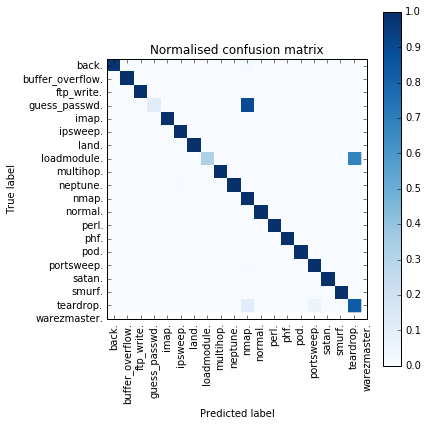

Classification report:
                  precision    recall  f1-score   support

           back.       1.00      0.98      0.99      1005
buffer_overflow.       1.00      1.00      1.00       500
      ftp_write.       1.00      1.00      1.00       500
   guess_passwd.       1.00      0.11      0.19       500
           imap.       1.00      1.00      1.00       500
        ipsweep.       1.00      0.99      1.00      3730
           land.       1.00      1.00      1.00       500
     loadmodule.       1.00      0.32      0.49       500
       multihop.       1.00      1.00      1.00     20000
        neptune.       0.91      1.00      0.95      1149
           nmap.       0.97      1.00      0.98     20000
         normal.       1.00      1.00      1.00       500
           perl.       1.00      1.00      1.00       500
            phf.       0.99      1.00      1.00       500
            pod.       1.00      1.00      1.00      1437
      portsweep.       0.98      1.00      0.99 

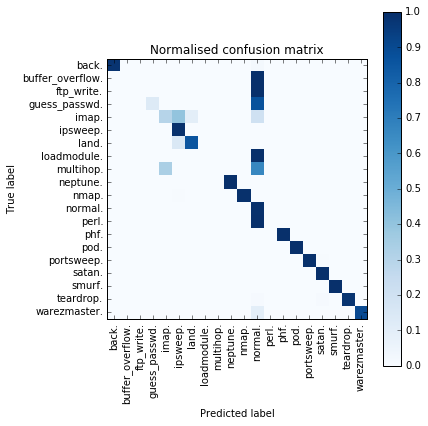

Classification report:
                  precision    recall  f1-score   support

           back.       1.00      0.98      0.99       997
buffer_overflow.       0.00      0.00      0.00         4
      ftp_write.       0.00      0.00      0.00         6
   guess_passwd.       1.00      0.13      0.23        23
           imap.       0.43      0.30      0.35        10
        ipsweep.       0.97      0.99      0.98      3849
           land.       0.38      0.86      0.52         7
     loadmodule.       0.00      0.00      0.00         2
       multihop.       0.00      0.00      0.00         3
        neptune.       1.00      1.00      1.00    102293
           nmap.       0.52      0.99      0.68      1167
         normal.       1.00      1.00      1.00    281286
           perl.       0.00      0.00      0.00         1
            phf.       0.17      1.00      0.29         1
            pod.       0.26      1.00      0.42        18
      portsweep.       0.96      0.99      0.98 

In [17]:
from sklearn.linear_model import LogisticRegression

clf = OneVsOneClassifier(LogisticRegression(random_state=101))
clf.fit(X_train_sampled_balanced, y_train_sampled_balanced)

y_train_pred = clf.predict(X_train_sampled_balanced)
y_test_pred = clf.predict(X_test)

print("TRAIN SET")
print("Accuracy:", accuracy_score(y_train_sampled_balanced, y_train_pred))

print("Confusion matrix:")
plot_normalised_confusion_matrix(confusion_matrix(y_train_sampled_balanced, y_train_pred), labels_map)

print("Classification report:")
print(classification_report(y_train_sampled_balanced, y_train_pred, target_names=labels_map))



print("TEST SET")
print("Accuracy:", accuracy_score(y_test, y_test_pred))

print("Confusion matrix:")
plot_normalised_confusion_matrix(confusion_matrix(y_test, y_test_pred), labels_map)

print("Classification report:")
print(classification_report(y_test, y_test_pred, target_names=labels_map))



